# Houses Prices 

In this project, I analyzed "House Prices" Kaggle dataset. Firstly I started with preprocessing step. Then I found answers for;

1. How does the increase in sales prices change according to the house construction year?

2. How to change the price per square meter according to the house construction year ?

3. What are the factors that affect home sales?


You can access the data from this link:  https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data

*All analyzes were done on train data.

# 1.Data Understanding

In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
scale= StandardScaler()

In [48]:
#import sample, test and train data
train = pd.read_csv("train.csv")

In [49]:
train.shape

(1460, 81)

In [50]:
price_data=train.copy()

In [51]:
#check data types
price_data.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
                  ...   
BedroomAbvGr       int64
KitchenAbvGr       int64
KitchenQual       object
TotRmsAbvGrd       int64
Functional        object
Fireplaces         int64
FireplaceQu       object
GarageType        object
GarageYrBlt      float64


In [52]:
#find mean, std, max, min values
def descriptive(data):
    
    """
    Find descriptive statistics result for all columns
    Descriptive statistics(mean, std, count etc.)
    
    Parameters:
    data (dataframe): the data set we will look at descriptive statistics
    
    Returns:
    data_describe(dataframe): show details for all columns
    
    """
    data_describe=data.describe().transpose()
    
    return data_describe

In [53]:
descriptive(price_data)

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


Observation Results

1.When I examined each column one by one, I saw that there was missing data.

2.There are 79 different features that are thought to affect the sales price.

3.Descriptive statistical values of the data set are available in the table above.

# 2. Prepare Data

In [54]:
#check null values for each columns
price_data.isnull().sum().sort_values(ascending=False)

PoolQC           1453
MiscFeature      1406
Alley            1369
Fence            1179
FireplaceQu       690
LotFrontage       259
GarageCond         81
GarageType         81
GarageYrBlt        81
GarageFinish       81
GarageQual         81
BsmtExposure       38
BsmtFinType2       38
BsmtFinType1       37
BsmtCond           37
BsmtQual           37
MasVnrArea          8
MasVnrType          8
Electrical          1
Utilities           0
YearRemodAdd        0
MSSubClass          0
Foundation          0
ExterCond           0
ExterQual           0
Exterior2nd         0
Exterior1st         0
RoofMatl            0
RoofStyle           0
YearBuilt           0
                 ... 
GarageArea          0
PavedDrive          0
WoodDeckSF          0
OpenPorchSF         0
3SsnPorch           0
BsmtUnfSF           0
ScreenPorch         0
PoolArea            0
MiscVal             0
MoSold              0
YrSold              0
SaleType            0
Functional          0
TotRmsAbvGrd        0
KitchenQua

In [55]:
#tatol of missing data
print('Total number of missing data: ',price_data.isnull().sum().sum())

Total number of missing data:  6965


In [56]:
#proportion of missing data for each column
price_data.isnull().mean().sort_values(ascending=False)

PoolQC           0.995205
MiscFeature      0.963014
Alley            0.937671
Fence            0.807534
FireplaceQu      0.472603
LotFrontage      0.177397
GarageCond       0.055479
GarageType       0.055479
GarageYrBlt      0.055479
GarageFinish     0.055479
GarageQual       0.055479
BsmtExposure     0.026027
BsmtFinType2     0.026027
BsmtFinType1     0.025342
BsmtCond         0.025342
BsmtQual         0.025342
MasVnrArea       0.005479
MasVnrType       0.005479
Electrical       0.000685
Utilities        0.000000
YearRemodAdd     0.000000
MSSubClass       0.000000
Foundation       0.000000
ExterCond        0.000000
ExterQual        0.000000
Exterior2nd      0.000000
Exterior1st      0.000000
RoofMatl         0.000000
RoofStyle        0.000000
YearBuilt        0.000000
                   ...   
GarageArea       0.000000
PavedDrive       0.000000
WoodDeckSF       0.000000
OpenPorchSF      0.000000
3SsnPorch        0.000000
BsmtUnfSF        0.000000
ScreenPorch      0.000000
PoolArea    

In [57]:
#created "null" dataframe for sum of null values for each columns
null=pd.DataFrame(price_data.isnull().sum())

#rename sum of null column to "missing_number"
null=null.rename(columns={0: "missing_number"})

#calculate percantege of missing values for each column
null["perc"]=null["missing_number"] / price_data.shape[0] * 100
null.sort_values(by="perc", ascending=False).head(10)

,missing_number,perc
PoolQC,1453,99.520548
MiscFeature,1406,96.301370
Alley,1369,93.767123
Fence,1179,80.753425
FireplaceQu,690,47.260274
LotFrontage,259,17.739726
GarageYrBlt,81,5.547945
GarageCond,81,5.547945
GarageType,81,5.547945
GarageFinish,81,5.547945


In [58]:
#determine which columns are dropped
remove=null.sort_values(by="perc", ascending=False).head(6)
print("remove columns:  " ,remove.index)

#drop percenatge of missing values are really high (more than 0.20)
price_data_new=price_data.drop(remove.index, axis=1)
print("After remove some columns shape of price_data_new dataframe:   ",price_data_new.shape )

remove columns:   Index(['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu',
       'LotFrontage'],
      dtype='object')
After remove some columns shape of price_data_new dataframe:    (1460, 75)


Observations:

1.Total number of missing data is 6.965

2.Top 10 features for missing data; PoolQC, MiscFeature, Alley, Fence, FireplaceQu, , LotFrontage, GarageYrBlt,GarageCond, GarageType,GarageFinish.

3.I decided to delete some columns. Because it contains more than 50 percent missing value. (except LotFrontage percentage of missing value is %17)

4.PoolQC, MiscFeature, Alley, Fence, FireplaceQu and LotFrontage dropped out.


In [59]:
#calculate mean of missing values for each rows
price_data_new["row_perc_null"]=price_data_new.isnull().mean(axis=1)
price_data_new["row_perc_null"].head(5)

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: row_perc_null, dtype: float64

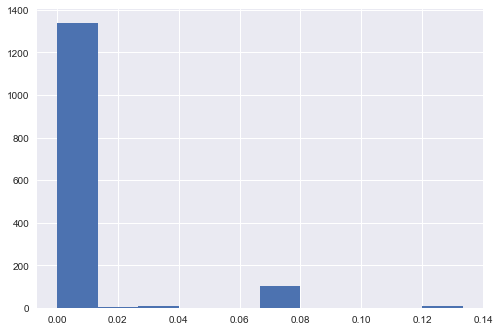

In [60]:
plt.hist(price_data_new["row_perc_null"])
plt.show()

In [61]:
#How many rows are under the %10 percantage of missing value;
print("<0.10 : ",  len(price_data_new[price_data_new["row_perc_null"]<0.10]) / price_data_new.shape[0])
print("<0.15 : ",  len(price_data_new[price_data_new["row_perc_null"]<0.15]) / price_data_new.shape[0])

<0.10 :  0.9952054794520548
<0.15 :  1.0


Observation results:

1.Missing value ratio is lower than 10% in 99 percent of the row.


In [62]:
#find unique values number for each columns
count=[]
for column_name in price_data_new.columns:
    price_data_new[column_name]
    count.append(price_data_new[column_name].nunique())

In [63]:
unique_number=pd.DataFrame(count, price_data_new.columns, columns=[ "unique_number"])

In [64]:
unique_number["unique_number"]= unique_number["unique_number"].astype(int)

In [65]:
unique_number.sort_values(by="unique_number", ascending=False)

,unique_number
Id,1460
LotArea,1073
GrLivArea,861
BsmtUnfSF,780
1stFlrSF,753
TotalBsmtSF,721
SalePrice,663
BsmtFinSF1,637
GarageArea,441
2ndFlrSF,417


In [66]:
#number of columns (unique value>=10)
len(unique_number[unique_number["unique_number"]>=10])

29

In [67]:
#find object
data_object=price_data_new.select_dtypes(include=[object])
object_column=data_object.columns

In [68]:
data_object.shape

(1460, 38)

In [69]:
#find unique number for each columns
more_10=unique_number[unique_number["unique_number"]>=2].index

In [70]:
#find intersection columns
remove_column=more_10.intersection(object_column);remove_column

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

In [71]:
#drop percenatge of missing values are really high (more than 0.20)
price_data_new=price_data_new.drop(remove_column, axis=1)
print("After remove some columns shape of price_data_new dataframe:   ",price_data_new.shape )

After remove some columns shape of price_data_new dataframe:    (1460, 38)


Observation results:

1.In the data set, 35 columns type's are object.

2.29 columns; each columns get 10 more different values.

3.I decide to drop object data types and number of unique valeus are more than 2.

4."remove_columns" were dropped.

In [72]:
price_data_new

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,row_perc_null
0,1,60,8450,7,5,2003,2003,196.0,706,0,...,61,0,0,0,0,0,2,2008,208500,0.000000
1,2,20,9600,6,8,1976,1976,0.0,978,0,...,0,0,0,0,0,0,5,2007,181500,0.000000
2,3,60,11250,7,5,2001,2002,162.0,486,0,...,42,0,0,0,0,0,9,2008,223500,0.000000
3,4,70,9550,7,5,1915,1970,0.0,216,0,...,35,272,0,0,0,0,2,2006,140000,0.000000
4,5,60,14260,8,5,2000,2000,350.0,655,0,...,84,0,0,0,0,0,12,2008,250000,0.000000
5,6,50,14115,5,5,1993,1995,0.0,732,0,...,30,0,320,0,0,700,10,2009,143000,0.000000
6,7,20,10084,8,5,2004,2005,186.0,1369,0,...,57,0,0,0,0,0,8,2007,307000,0.000000
7,8,60,10382,7,6,1973,1973,240.0,859,32,...,204,228,0,0,0,350,11,2009,200000,0.000000
8,9,50,6120,7,5,1931,1950,0.0,0,0,...,0,205,0,0,0,0,4,2008,129900,0.000000
9,10,190,7420,5,6,1939,1950,0.0,851,0,...,4,0,0,0,0,0,1,2008,118000,0.000000


Details for target value/SalePrice

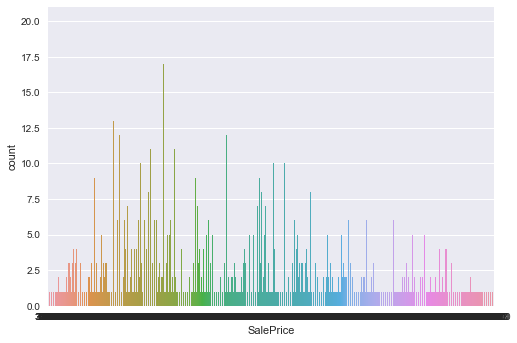

In [73]:
sns.countplot(price_data_new["SalePrice"])
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


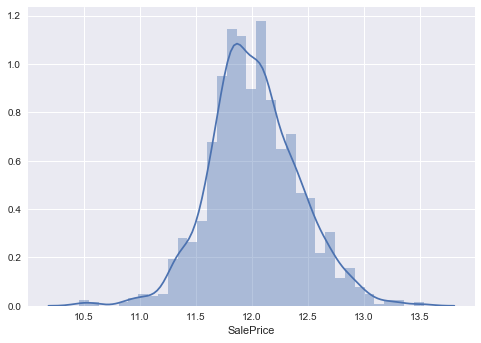

In [74]:
sns.distplot(np.log(price_data_new.SalePrice))
plt.show()

In [75]:
#check all columns 
control=price_data_new._get_numeric_data()

In [76]:
c1=control.columns
c2=price_data_new.columns

In [77]:
if len(c1.intersection(c2)) == len(c2):
    print("data is ready")
else:
    print("check again")
        

data is ready


In [113]:
price_data_new.head()

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,row_perc_null,unit_price
0,1,60,8450,7,5,2003,2003,196.0,706,0,...,0,0,0,0,0,2,2008,208500,0.0,24.674556
1,2,20,9600,6,8,1976,1976,0.0,978,0,...,0,0,0,0,0,5,2007,181500,0.0,18.906250
2,3,60,11250,7,5,2001,2002,162.0,486,0,...,0,0,0,0,0,9,2008,223500,0.0,19.866667
3,4,70,9550,7,5,1915,1970,0.0,216,0,...,272,0,0,0,0,2,2006,140000,0.0,14.659686
4,5,60,14260,8,5,2000,2000,350.0,655,0,...,0,0,0,0,0,12,2008,250000,0.0,17.531557


# 3. Modeling

# Q1: How does the increase in sales prices change according to the house construction year?

In [79]:
price_data_new.head()

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,row_perc_null
0,1,60,8450,7,5,2003,2003,196.0,706,0,...,61,0,0,0,0,0,2,2008,208500,0.0
1,2,20,9600,6,8,1976,1976,0.0,978,0,...,0,0,0,0,0,0,5,2007,181500,0.0
2,3,60,11250,7,5,2001,2002,162.0,486,0,...,42,0,0,0,0,0,9,2008,223500,0.0
3,4,70,9550,7,5,1915,1970,0.0,216,0,...,35,272,0,0,0,0,2,2006,140000,0.0
4,5,60,14260,8,5,2000,2000,350.0,655,0,...,84,0,0,0,0,0,12,2008,250000,0.0


In [97]:
price_mean=price_data_new[["YearBuilt", "SalePrice"]].groupby("YearBuilt", as_index=False).mean()

In [100]:
x=price_mean["YearBuilt"]
y=price_mean["SalePrice"]

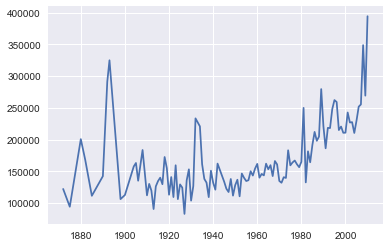

In [101]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(x, y)

As I expected, house prices have increased gradually over the years. There was a sudden increase between 1880 and 1900. We observe increases and decreases at certain intervals.

# Q2: How to change the price per square meter according to the house construction year ?

In [110]:
price_data_new["unit_price"]=price_data_new["SalePrice"]/price_data_new["LotArea"]

In [111]:
unit=price_data_new[["unit_price", "YearBuilt"]].groupby("YearBuilt", as_index=False).mean()

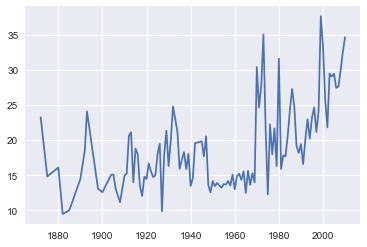

In [112]:
%matplotlib inline
import matplotlib.pyplot as plt

y= unit["unit_price"]
x= unit["YearBuilt"]

plt.plot(x, y)

Sales prices per square meter have also increased steadily.

# Q3: What are the factors that affect home sales?

In [90]:
def correlation(data):
    """
    Find correlation between all columns/features
    
    Parameters:
    data (dataframe): describe the data set we will look at correlation
    
    Returns:
    heatmap graph: correlation results, heatmap graph
    
    """
    
    plt.figure(figsize=(24,24))
    sns.heatmap(data.corr(),cmap='YlGnBu',annot=True,fmt = ".2f",cbar=False)
    plt.xticks(rotation=90)
    plt.yticks(rotation=0)
    plt.title('Correlation Map')
    
    return plt.show()

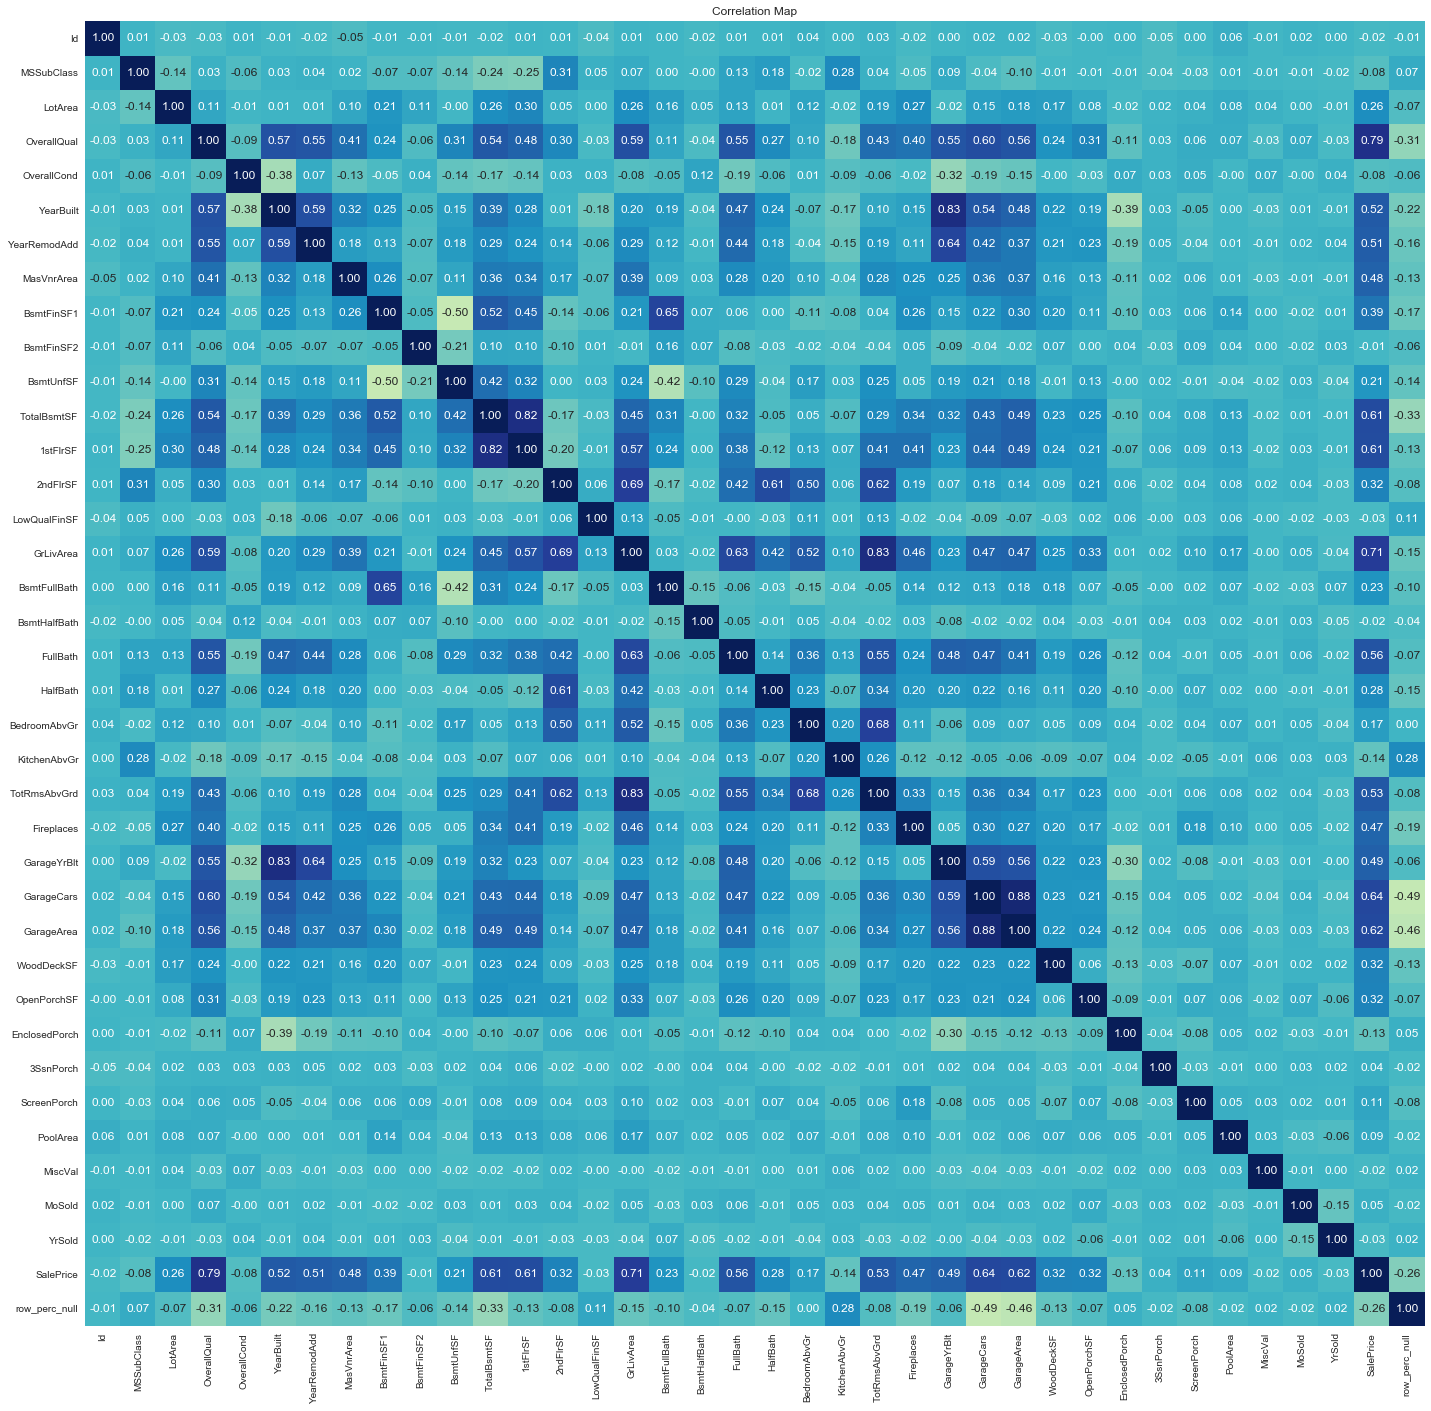

In [234]:
correlation(price_data_new)

In [240]:
corr=price_data.corr(method='spearman')
c=corr.loc["SalePrice"];c
c.sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.809829
GrLivArea        0.731310
GarageCars       0.690711
YearBuilt        0.652682
GarageArea       0.649379
FullBath         0.635957
TotalBsmtSF      0.602725
GarageYrBlt      0.593788
1stFlrSF         0.575408
YearRemodAdd     0.571159
TotRmsAbvGrd     0.532586
Fireplaces       0.519247
OpenPorchSF      0.477561
LotArea          0.456461
MasVnrArea       0.421309
LotFrontage      0.409076
WoodDeckSF       0.353802
HalfBath         0.343008
BsmtFinSF1       0.301871
2ndFlrSF         0.293598
BedroomAbvGr     0.234907
BsmtFullBath     0.225125
BsmtUnfSF        0.185197
ScreenPorch      0.100070
MoSold           0.069432
3SsnPorch        0.065440
PoolArea         0.058453
MSSubClass       0.007192
BsmtHalfBath    -0.012189
Id              -0.018546
YrSold          -0.029899
BsmtFinSF2      -0.038806
MiscVal         -0.062727
LowQualFinSF    -0.067719
OverallCond     -0.129325
KitchenAbvGr    -0.164826
EnclosedPorch   -0.218394
Name: SalePr

In [32]:
from scipy import stats
rho,ind_pval=stats.spearmanr(a=price_data[['OverallQual']], b=price_data[["SalePrice"]], axis=0)
pd.DataFrame(ind_pval[ind_pval<0.05])

,0
0,0.0


In [33]:
rho,ind_pval=stats.spearmanr(a=price_data[['GrLivArea']], b=price_data[["SalePrice"]], axis=0)
pd.DataFrame(ind_pval[ind_pval<0.05])

,0
0,1.431015e-244


In [34]:
rho,ind_pval=stats.spearmanr(a=price_data[['GarageCars']], b=price_data[["SalePrice"]], axis=0)
pd.DataFrame(ind_pval[ind_pval<0.05])

,0
0,1.654517e-207


There are strongly positively relation between SalePrice and OverallQual, GrLivArea, GarageCars and YearBuilt features. Correlation coefficient values explain relation.

There are negative relation between SalePrice and EnclosedPorch, KitchenAbvGr and OverallCond.

# 4. Evaluation

I examined the sales trend with the data we cleared. I found the correlation between sales and all features.Sales prices followed an increasing trend over the years. The overall quantity that affects the sales price as I expected.